**Iris DatasetClustering using KMeans**

**Importing Dataset**

In [ ]:
file = open('/content/1632506309_3197203_iris_new_data_test.csv')
lines = file.readlines()
lines

sepal_length =[]
sepal_width = []
petal_length = []
petal_width =[]

#spliting data based on \n
for l in lines:
  l = l.replace('\n', '')
  split_val = l.split(' ')
  sepal_length.append(float(split_val[0]))
  sepal_width.append(float(split_val[1]))
  petal_length.append(float(split_val[2]))
  petal_width.append(float(split_val[3]))

In [ ]:
#adding column headings
data = {"sepal_length":sepal_length,"sepal_width":sepal_width,"petal_length":petal_length,"petal_width":petal_width}

import pandas as pd

df = pd.DataFrame.from_dict(data)

**Applying KMeans**

In [ ]:
import numpy as np
from scipy.spatial import distance


def kmeans(data,k, max_iter = 300):

  k_points = np.random.choice(len(data), k, replace=False) #choosing random centroids
  centroids = data.iloc[k_points, :]
  distances = distance.cdist(data, centroids ,'cosine')
  points = np.array([np.argmin(i) for i in distances])
  for _ in range(max_iter):
    centroids = []
    for i in range(k):
      temp_cent = data.iloc[points==i].mean(axis=0)
      centroids.append(temp_cent)

    centroids = np.vstack(centroids)
    distances = distance.cdist(data, centroids ,'cosine')
    points = np.array([np.argmin(i) for i in distances])  
  return points

In [ ]:
#saving output
f=open('./HW3_part1_output.txt', 'w') 
f.writelines("%s \n"%i for i in kmeans(df,3,50))
f.close()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

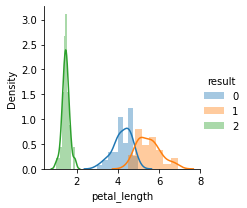

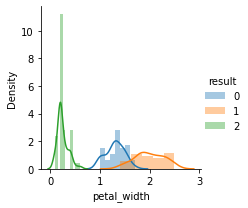

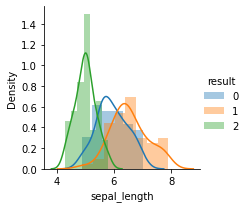

In [ ]:
output = kmeans(df,3,50)
df["result"] = output
import seaborn as sns

sns.FacetGrid(df,hue="result",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(df,hue="result",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(df,hue="result",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

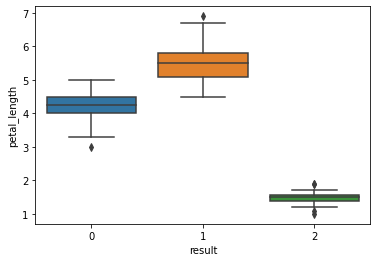

In [ ]:
sns.boxplot(x="result",y="petal_length",data=df)
plt.show()

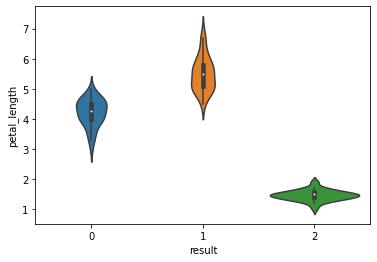

In [ ]:
sns.violinplot(x="result",y="petal_length",data=df)
plt.show()